In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1 score', 'Exam2 score', 'result'])
data.head()

,Exam1 score,Exam2 score,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


下面画数据的散点图


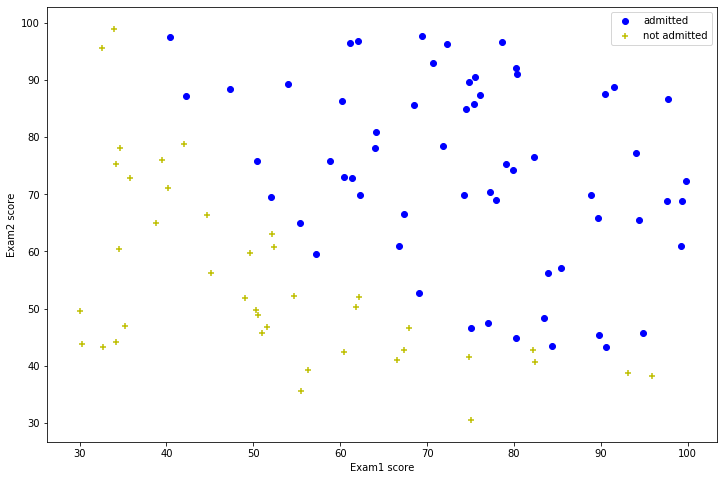

In [3]:
positive = data[data['result'].isin([1])]
negtive = data[data['result'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1 score'], positive['Exam2 score'], c='b', marker='o', label='admitted')
ax.scatter(negtive['Exam1 score'], negtive['Exam2 score'], c='y', marker='+', label='not admitted')
ax.legend()

plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.show()

下面编写sigmoid函数


In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


下面编写cost函数


In [5]:
def cost(theta, X, Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    m = len(X)
    first = np.multiply(-Y, np.log(sigmoid(X @ theta.T)))
    second = np.multiply((1 - Y), np.log(1 - sigmoid(X @ theta.T)))
    result = np.sum(first - second) / m
    return result
    

下面编写单次梯度下降函数



In [6]:
# def gradient_decent(theta, alpha, X, Y, itera):
#     temp = np.matrix(np.zeros(theta.shape))
#     paramiters = int(theta.ravel().shape[1])
#     cost = np.zeros(itera)
#     
#     for i in range(itera):
#         temp = theta
#         
#         for j in range(paramiters):
#             theta[j] = temp[j] - (alpha * np.sum(sigmoid(X) - Y) * X[j]) 
#         cost[i] = computecost(theta, X, Y)
#         
#     return cost, theta

def gradient(theta, X, Y):

    theta = np.matrix(theta)
    return ((sigmoid(X * theta.T) - Y).T * X) / len(X)

        

下面是对读到的数据进行处理使其变成矩阵的格式


In [7]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
Y = data.iloc[:, cols -1:cols]

theta = np.zeros(3)
X = np.matrix(X.values)
Y = np.matrix(Y.values)

调用fmin_tnc函数进行梯度下降



In [8]:
print(cost(theta, X, Y))
print(gradient(theta, X, Y))
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, Y))
# res = opt.minimize(fun=cost, x0=theta, args=(X, Y), method='Newton-CG', jac=gradient)
cost(result[0], X, Y)


0.6931471805599453
[[ -0.1        -12.00921659 -11.26284221]]


0.20349770158947467

编写预测准确率的函数


In [9]:
def predict(theta, X, Y):
    theta = np.matrix(theta)
    pre_Y = sigmoid(X * theta.T)
    count = 0
    for i in range(len(X)):
        if (pre_Y[i] >= 0.5 and Y[i] == 1) or (pre_Y[i] < 0.5 and Y[i] == 0):
            count = count + 1
    print('the accuracy is %s' % str(count/len(X)))

In [10]:
predict(result[0], X, Y)


the accuracy is 0.89


画分边界线


[124.88774026  -1.02362668  -1.        ]


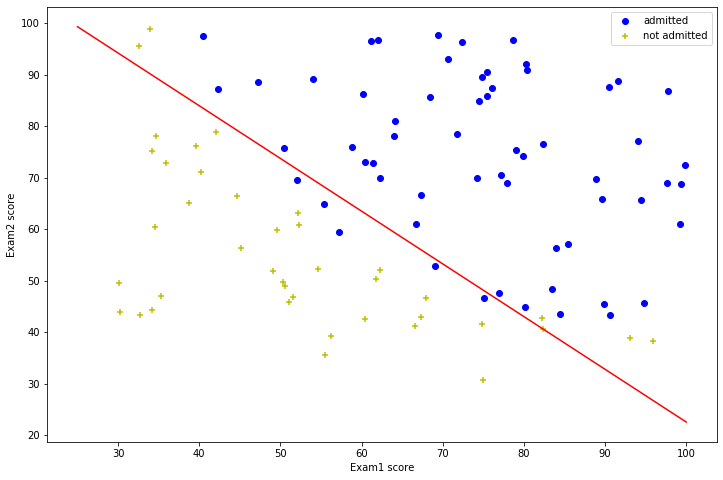

In [11]:
positive = data[data['result'].isin([1])]
negtive = data[data['result'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1 score'], positive['Exam2 score'], c='b', marker='o', label='admitted')
ax.scatter(negtive['Exam1 score'], negtive['Exam2 score'], c='y', marker='+', label='not admitted')
ax.legend()

plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')

final_theta = (result[0] * -1)/result[0][2]
print(final_theta)
plot_X = np.linspace(25, 100, 100)
plot_Y = final_theta[0] + final_theta[1] * plot_X
ax.plot(plot_X, plot_Y, 'r')
plt.show()

